# Read Data

In [3]:
import pandas as pd
A=pd.read_csv("c:/Users/hp/Desktop/Data/Cars93.csv")
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [4]:
B=A[["MPG.city","Price"]]
B

,MPG.city,Price
0,25,15.9
1,18,33.9
2,20,29.1
3,19,37.7
4,22,30.0
...,...,...
88,17,19.7
89,21,20.0
90,18,23.3
91,21,22.7


In [5]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit_transform(B)

array([[ 4.71312488e-01, -3.75720139e-01],
       [-7.81032122e-01,  1.49784409e+00],
       [-4.23219377e-01,  9.98226964e-01],
       [-6.02125750e-01,  1.89337432e+00],
       [-6.54066309e-02,  1.09190518e+00],
       [-6.54066309e-02, -3.96537519e-01],
       [-6.02125750e-01,  1.34305680e-01],
       [-1.13884487e+00,  4.36157694e-01],
       [-6.02125750e-01,  7.06783639e-01],
       [-1.13884487e+00,  1.58111361e+00],
       [-1.13884487e+00,  2.14318288e+00],
       [ 4.71312488e-01, -6.35937393e-01],
       [ 4.71312488e-01, -8.44111196e-01],
       [-6.02125750e-01, -4.58989660e-01],
       [-2.44313004e-01, -3.75720139e-01],
       [-7.81032122e-01, -3.34085378e-01],
       [-1.31775124e+00, -3.02859307e-01],
       [-9.59938495e-01, -7.38681238e-02],
       [-9.59938495e-01,  1.92460039e+00],
       [-4.23219377e-01, -1.15502884e-01],
       [ 1.13499742e-01, -3.86128829e-01],
       [-4.23219377e-01,  1.03986172e+00],
       [ 1.18693798e+00, -1.07310238e+00],
       [ 1.

In [9]:
C=pd.DataFrame(ss.fit_transform(B),columns=["MPG.city","Price"])
C

,MPG.city,Price
0,0.471312,-0.375720
1,-0.781032,1.497844
2,-0.423219,0.998227
3,-0.602126,1.893374
4,-0.065407,1.091905
...,...,...
88,-0.959938,0.019810
89,-0.244313,0.051036
90,-0.781032,0.394523
91,-0.244313,0.332071


In [10]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
model = km.fit(C)
model.labels_

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1])

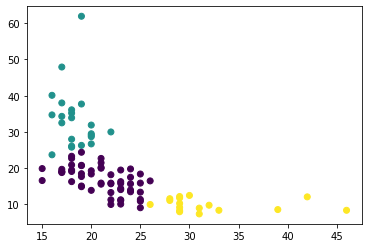

In [11]:
import matplotlib.pyplot as plt
plt.scatter(A["MPG.city"],A.Price,c=model.labels_)

In [12]:
B["Cluster"]=model.labels_
B

<ipython-input-12-e897268a18d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B["Cluster"]=model.labels_


,MPG.city,Price,Cluster
0,25,15.9,0
1,18,33.9,1
2,20,29.1,1
3,19,37.7,1
4,22,30.0,1
...,...,...,...
88,17,19.7,0
89,21,20.0,0
90,18,23.3,0
91,21,22.7,0
